In [530]:
import pandas as pd
import numpy as np
np.random.seed(2019)
import matplotlib.pyplot as plt
import shap
shap.initjs()

In [531]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

In [532]:
df1 = pd.read_csv('/Users/laura/OneDrive - Boston University/rf1.csv')
df2 = pd.read_csv('/Users/laura/OneDrive - Boston University/rf2.csv')

In [533]:
df1

,Payer_Category,Age,Sex,Outcome,Outcome_index,Body_Region,Admission_Outcome_Score,Admission_Pain,Chronic_Pain,Start_Risk,Fin_Suc,week_dif,day_dif,vist_dif
0,Commercial,19,MALE,LOWER EXTREMITY FUNC SCALE,Good,FOOT/ANKLE,67.0,5,YES,NaN,0,26,182,12-40
1,Commercial,23,FEMALE,MODIFIED LOW BACK DISABILITY QUESTIONNAIRE,Bad,LUMBAR,22.0,6,YES,LOW RISK,1,212,1486,>40
2,Commercial,63,MALE,MODIFIED LOW BACK DISABILITY QUESTIONNAIRE,Bad,LUMBAR,20.0,9,YES,MODERATE RISK,0,48,336,>40
3,Commercial,26,FEMALE,LOWER EXTREMITY FUNC SCALE,Good,KNEE,67.0,1,NO,LOW RISK,1,2,16,<=4
4,Commercial,19,MALE,LOWER EXTREMITY FUNC SCALE,Good,FOOT/ANKLE,49.0,4,NO,MODERATE RISK,1,5,35,5-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2943,Commercial,39,FEMALE,KNEE OUTCOME SURVEY,Good,KNEE,55.0,9,YES,LOW RISK,1,887,6208,>40
2944,Commercial,56,FEMALE,LOWER EXTREMITY FUNC SCALE,Good,HIP,61.0,2,NO,LOW RISK,0,1,8,<=4
2945,Commercial,25,MALE,KNEE OUTCOME SURVEY,Good,KNEE,69.0,4,NO,LOW RISK,1,14,95,12-40
2946,Commercial,55,FEMALE,LOWER EXTREMITY FUNC SCALE,Good,HIP,61.0,2,NO,LOW RISK,1,16,112,12-40


In [534]:
df1_dummies = pd.get_dummies(df1, columns = ['Payer_Category','Sex','Outcome','Body_Region',
        'Chronic_Pain','Start_Risk','Outcome_index'], drop_first = True)

In [565]:
df1_dummies

Y = df1_dummies['Fin_Suc']

X = df1_dummies.drop(['Fin_Suc','vist_dif','day_dif'],axis=1)

#Y = np.array(Y)
#X = np.array(X)
#data = data.drop("Area", axis=1)

In [729]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [746]:
clf = RandomForestClassifier(max_depth = 14, random_state = 2010 , min_samples_split = 20)

In [747]:
clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2010,
                       verbose=0, warm_start=False)

In [748]:
predicted = clf.predict(X_test)

In [749]:
# test[:,[0,2]]

np.mean(predicted[:]==Y_test[:])


0.7389830508474576

In [750]:
explainer = shap.TreeExplainer(clf,X_test)

In [783]:
Y_test[0:20]

647     1
2552    0
2483    0
922     1
2589    1
2258    0
2397    0
1586    1
1859    1
593     0
2726    0
404     1
1718    1
741     0
1132    0
2270    1
1054    0
297     1
445     0
967     0
Name: Fin_Suc, dtype: int64

In [809]:
predicted[50:100]==Y_test[50:100]

261     False
1467     True
2433    False
935     False
189     False
2880     True
1159     True
2403    False
17       True
2742     True
1092     True
2321     True
1756     True
2452    False
2378     True
1757     True
2698     True
2067     True
2070    False
449      True
2535     True
1175     True
1207     True
217      True
870      True
2741     True
1289     True
949     False
916      True
2001    False
2831     True
1191     True
1371     True
515      True
1724    False
2456     True
1516    False
2870     True
1510    False
763      True
1284     True
135      True
1122    False
2711     True
1009    False
1570     True
222      True
1762    False
1417     True
773      True
Name: Fin_Suc, dtype: bool

In [751]:
shap_values = explainer.shap_values(X_test,check_additivity=False)

100%|===================| 1179/1180 [02:14<00:00]        

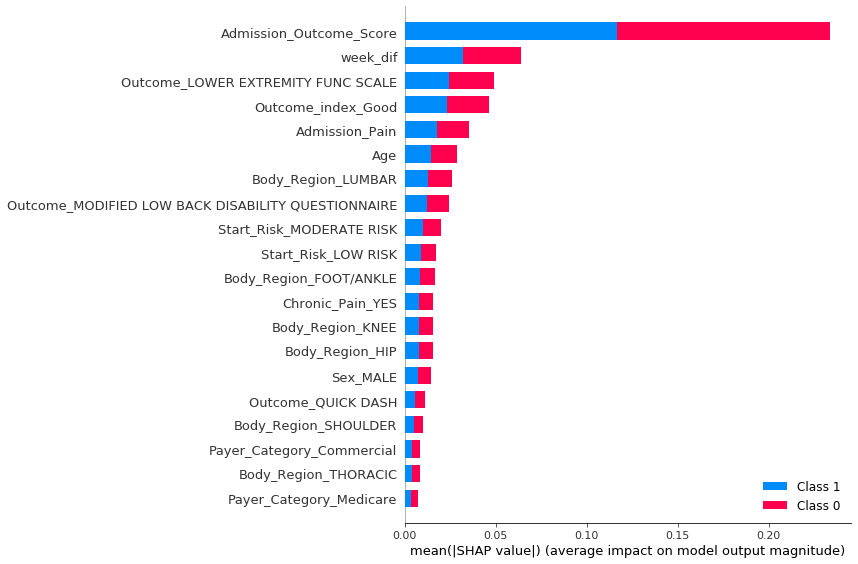

In [462]:
shap.summary_plot(shap_values, X_test)

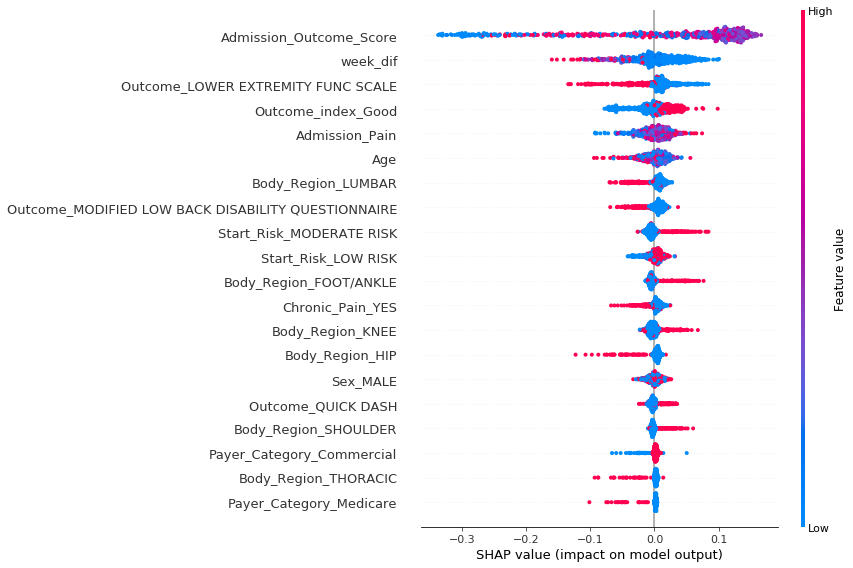

In [463]:
shap.summary_plot(shap_values[1], X_test)

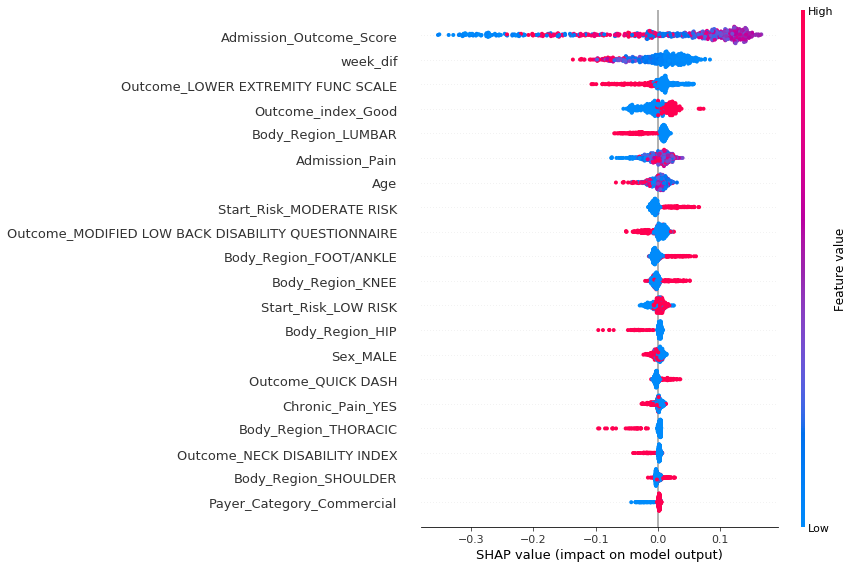

In [752]:
shap.summary_plot(shap_values[1], X_test)

In [782]:
shap.force_plot(explainer.expected_value[1], shap_values[1][4,:], X_test.iloc[4,:]) # 1

In [788]:
shap.force_plot(explainer.expected_value[1], shap_values[1][10,:], X_test.iloc[10,:]) # 1

In [815]:
shap.force_plot(explainer.expected_value[1], shap_values[1][71,:], X_test.iloc[71,:]) # 0

In [839]:
shap.force_plot(explainer.expected_value[1], shap_values[1][28,:], X_test.iloc[28,:])

In [853]:
shap.force_plot(explainer.expected_value[1], shap_values[1][131,:], X_test.iloc[131,:])

In [840]:
X_test[110:150]

,Age,Admission_Outcome_Score,Admission_Pain,week_dif,Payer_Category_Commercial,Payer_Category_HAS,Payer_Category_Medicare,Payer_Category_Medicare Compliment,Payer_Category_Medicare Replacement,Payer_Category_Medicare Supplement,...,Body_Region_KNEE,Body_Region_LUMBAR,Body_Region_SHOULDER,Body_Region_THORACIC,Body_Region_WRIST,Chronic_Pain_UNKNOWN,Chronic_Pain_YES,Start_Risk_LOW RISK,Start_Risk_MODERATE RISK,Outcome_index_Good
2830,21,61.0,5,32,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
370,19,60.0,0,209,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
1088,68,26.0,3,60,1,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2383,24,80.0,0,8,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
757,21,5.0,3,24,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
235,28,66.0,2,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1822,49,16.0,1,104,1,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2078,28,0.0,3,24,1,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
1232,43,46.0,7,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
724,53,50.0,7,3,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1


In [841]:
predicted[110:150]==Y_test[110:150]

2830     True
370     False
1088    False
2383     True
757      True
235      True
1822     True
2078     True
1232     True
724     False
2096    False
910      True
471      True
2677     True
1367     True
1035    False
2630    False
307      True
2682     True
2169     True
2365     True
662      True
1719    False
517      True
932      True
666      True
1668     True
304      True
1312     True
998      True
1696     True
2023     True
2241     True
1930     True
1396    False
1380     True
2227     True
614      True
475      True
487      True
Name: Fin_Suc, dtype: bool

In [856]:
predicted[71]

0

In [859]:
Y_test[68:71]

2070    0
449     0
2535    0
Name: Fin_Suc, dtype: int64